# Prueba jupyter api_pandas


In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [1]:
def sacarTemp():
    url='https://www.el-tiempo.net/api/json/v2/home'
    response= requests.get(url)
    if response.status_code==200:
        data= response.json()

        ciudades=[]
        temperatura_max=[]
        temperatura_min=[]

        for ciudad in data["ciudades"]:
            ciudades.append(ciudad["name"])
            temperatura_max.append(int(ciudad["temperatures"]["max"]))
            temperatura_min.append(int(ciudad["temperatures"]["min"]))

        df=pd.DataFrame({
            'Ciudad':ciudades,
            'Temperatura Max':temperatura_max,
            'Temperatura Min': temperatura_min
        })

        df.to_csv('datos_tiempo.csv',index=False,encoding='utf-8')
        print("los datos se guardaron correctamente")
    else:
        print("error al obtener los datos de la api")

In [8]:
def crearGrafico():
    df=pd.read_csv('datos_tiempo.csv')
    plt.figure(figsize=(10,6))
    plt.bar(df['Ciudad'], df['Temperatura Max'], color='red', label='Temperatura Máx')
    plt.bar(df['Ciudad'],df['Temperatura Min'], color='blue', label='Temperatura Mín')

    plt.xlabel('Ciudad')
    plt.ylabel('Temperatura')
    plt.title('Temperaturas máximas y minimas por ciudad')

    plt.xticks(rotation=45,ha='right')
    plt.legend()

    plt.tight_layout()
    plt.show()

los datos se guardaron correctamente


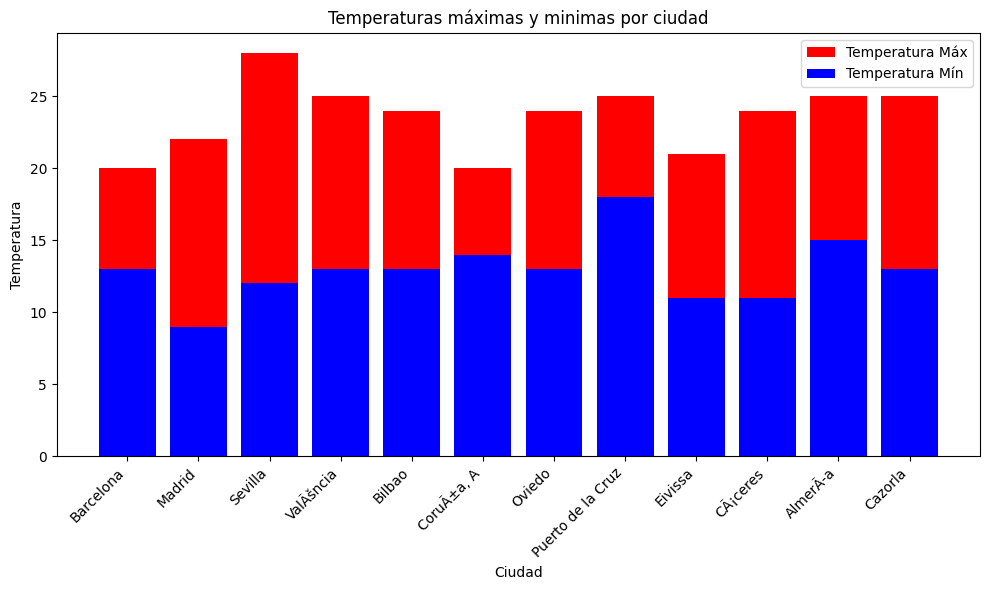

In [9]:
sacarTemp()
crearGrafico()